

---


##Samarth Motka
##202311023
##Assignment 2


---



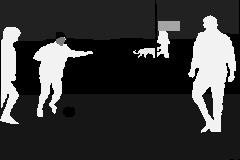

In [1]:
# Find out the number of objects from Figure 1. Label distinct objects with distinct colors.[Use the algorithm of finding out connected components.]
#Connected components labeling
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Daiict/sem2/DIP/lab_2/cc.jpg')
cv2_imshow(img)

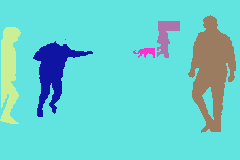

Number of objects: 7


In [7]:
import cv2
import numpy as np

def label_objects(image_path):
    # Read the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply adaptive thresholding for better object separation
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find connected components
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Get the number of objects
    num_objects = stats.shape[0] - 1  # Exclude background

    # Create a unique color for each labeled object
    colormap = np.random.randint(0, 255, size=(num_objects + 1, 3), dtype=np.uint8)

    # Create a colored output image
    colored_image = colormap[labels]

    # Display the result
    cv2_imshow(colored_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return num_objects

# Specify the image path
img_path = '/content/drive/MyDrive/Daiict/sem2/DIP/lab_2/cc.jpg'

num_objects = label_objects(img_path)
print(f'Number of objects: {num_objects}')


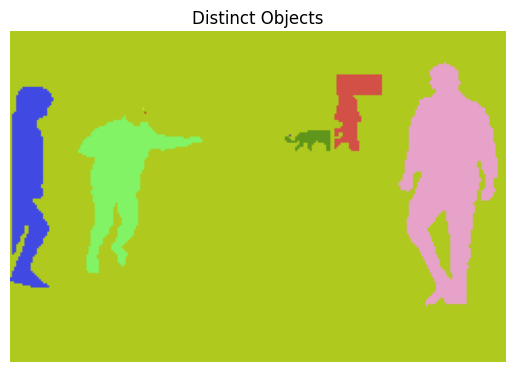

Number of objects: 7


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_and_threshold(image_path):
    # Read the image and apply adaptive thresholding
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def label_connected_components(binary_image):
    rows, cols = binary_image.shape
    labels = np.zeros_like(binary_image)
    current_label = 1

    def dfs(row, col):
        stack = [(row, col)]
        while stack:
            r, c = stack.pop()
            if 0 <= r < rows and 0 <= c < cols and binary_image[r, c] == 255 and labels[r, c] == 0:
                labels[r, c] = current_label
                stack.extend([(r+1, c), (r-1, c), (r, c+1), (r, c-1)])

    for i in range(rows):
        for j in range(cols):
            if binary_image[i, j] == 255 and labels[i, j] == 0:
                dfs(i, j)
                current_label += 1

    return labels

def visualize_results(labels):
    # Generate random colors for visualization
    colors = np.random.randint(0, 255, size=(np.max(labels)+1, 3), dtype=np.uint8)
    # Color the labeled components
    colored_labels = colors[labels]

    # Display the result using matplotlib
    plt.imshow(colored_labels)
    plt.title('Distinct Objects')
    plt.axis('off')
    plt.show()

def count_objects(labels):
    # Print the number of objects (excluding background)
    num_objects = np.max(labels) - 1
    print("Number of objects:", num_objects)
    return num_objects

# Specify the image path
img_path = '/content/drive/MyDrive/Daiict/sem2/DIP/lab_2/cc.jpg'

# Perform the operations
binary_image = read_and_threshold(img_path)
labels = label_connected_components(binary_image)
visualize_results(labels)
num_objects = count_objects(labels)
